# Dimension reduction

In [1]:
setwd('/Users/Gil/Documents/도큐멘트 - Gil의 MacBook Pro/R_work/R_edu_2018')
train.data <- read.table('dataset_28_optdigits.csv', sep=",", header=TRUE)

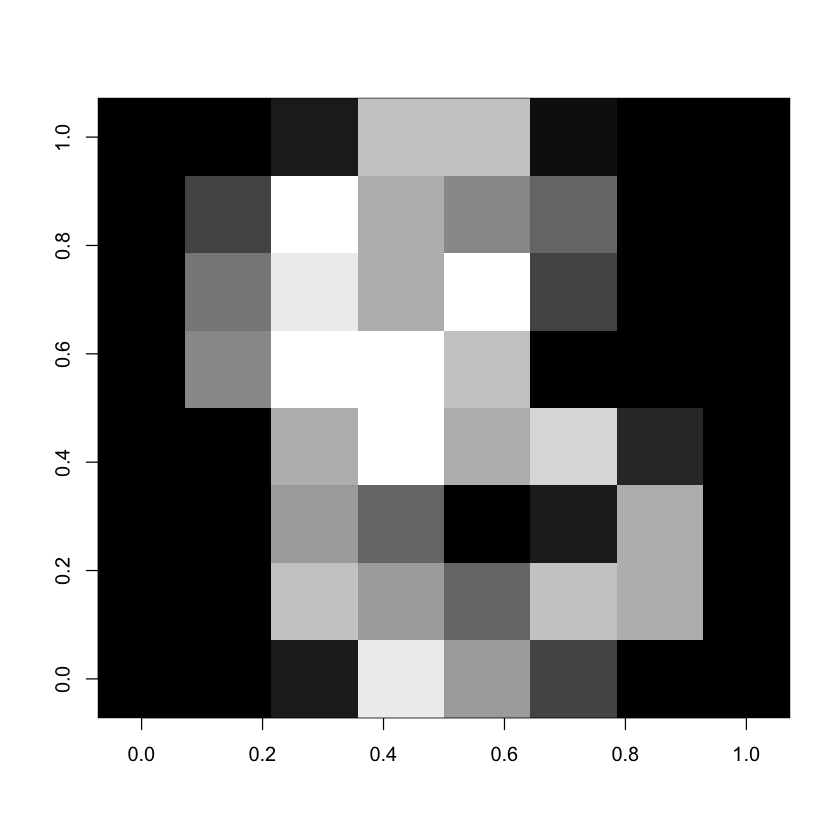

In [23]:
row.id <- 10
m <- matrix(as.numeric(train.data[row.id, 1:64]), nrow=8, ncol=8)
image(m[,8:1], col=grey(seq(0, 1, length=16)))

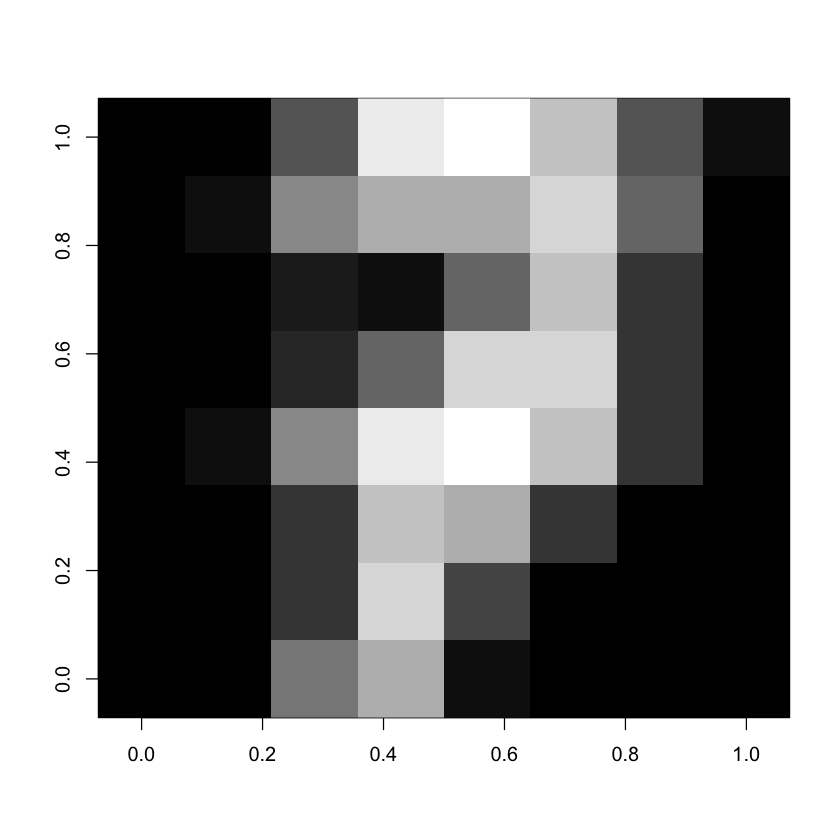

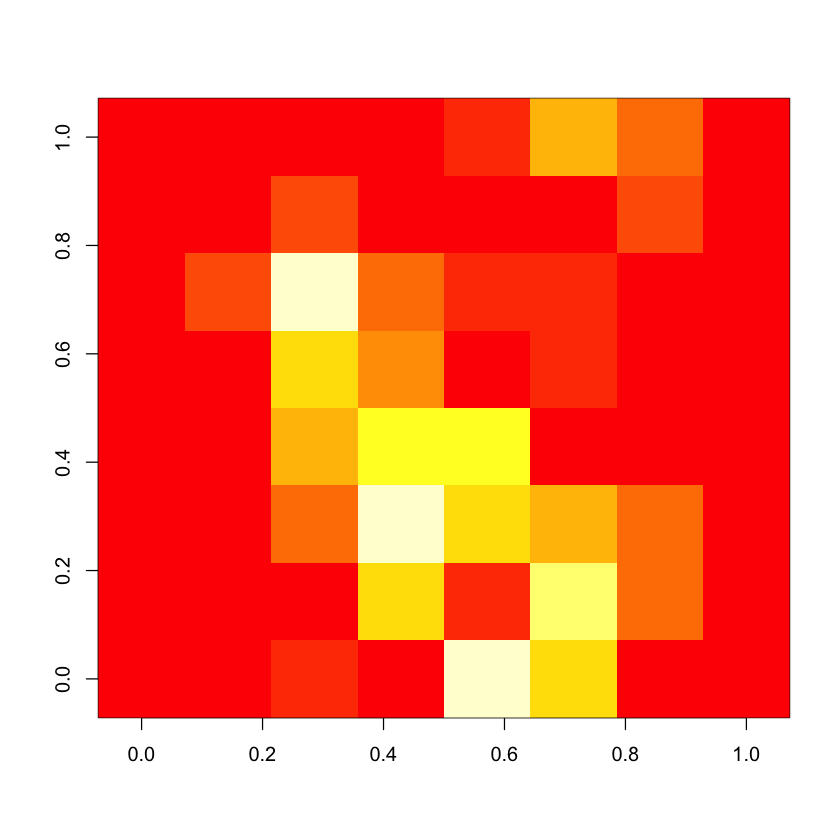

In [20]:
# select all training images for digits 8
train.8 <- train.data[train.data[,65]==7, 1:64]

average.8 <- matrix(as.numeric(colMeans(train.8)), nrow=8, ncol=8)

image(average.8[,8:1], col=grey(seq(0, 1, length=16)))


train.9 <- train.data[train.data[,65]==9, 1:64]
average.9 <- matrix(as.numeric(colMeans(train.9)), nrow=8, ncol=8)

# show the difference image of digits 7 compared to 9
image(abs(average.8 - average.9)[,8:1])

# Self-Organising Map (SOM)
> * a special type of a neural network (unsupervised learning)
> * generate a low dimensional representation of the data
> * the low-dimensional representation is called a map
> * known as KoHonen networks
> * https://en.wikipedia.org/wiki/Self-organizing_map

In [2]:
library(Rsomoclu)
library(kohonen)

trn <- data.matrix(train.data)


# SOM parameters for generating the map

nSomX <- 100
nSomY <- 100
nEpoch <- 10
radius0 <- 0
radiusN <- 0
radiusCooling <- "linear"
scale0 <- 0
scaleN <- 0.01
scaleCooling <- "linear"
kernelType <- 0
mapType <- "planar"
gridType <- "rectangular"
compactSupport <- FALSE
codebook <- NULL
neighborhood <- "gaussian"


som.res <- Rsomoclu.train(trn[,1:64], nEpoch, nSomX, nSomY,  radius0, radiusN,  radiusCooling, scale0, scaleN,  scaleCooling,  kernelType, mapType, gridType, compactSupport, neighborhood, codebook)

som.map <- Rsomoclu.kohonen(trn[,1:64], som.res)

ERROR: Error in is.data.frame(frame): 객체 'train.data'를 찾을 수 없습니다


In [4]:
library(RColorBrewer)

col.ind <- trn[,65] + 1
cols <- brewer.pal(10, "Paired")
cols[1] <- 'lightskyblue3'
cols[9] <- 'thistle4'

plot(som.map, type="mapping", labels=trn[,65], col=cols[col.ind], font=2, cex=1.5)

ERROR: Error in eval(expr, envir, enclos): 객체 'trn'를 찾을 수 없습니다


In [ ]:
plot(som.map, type = "property", property = som.map$codes[,36],  main = colnames(trn)[36])

In [ ]:
# Performance
som.prediction <- predict(som.map, newdata=tst[,1:64], trainY=factor(trn[,65]))

mean(som.prediction$prediction == tst[,65])

score = matrix(nrow=100,1)
for (s in seq(4,100,2))
{
   nSomX <- s
   nSomY <- s
   print(s)
 
   res <- Rsomoclu.train(trn[,1:64], nEpoch, nSomX, nSomY,  radius0, radiusN,  radiusCooling, scale0, scaleN,  scaleCooling,  kernelType, mapType, gridType, compactSupport, neighborhood, codebook)
 
   som.map = Rsomoclu.kohonen(trn[,1:64], res)
   som.prediction <- predict(som.map, newdata=tst[,1:64], trainY=factor(trn[,65]))
   score[s] <- mean(som.prediction$prediction == tst[,65])
   print(score[s])
}

# 1. t-SNE
> * t-Distributed Stochastic Neighbor Embedding
> * why?
>> * for Exploratory Data Anlaysis
>> * Experiments on the optdigits dataset 

In [ ]:
library(tsne)

trn <- data.matrix(train.data)

require(tsne)

cols <- rainbow(10)

# this is the epoch callback function used by tsne. 
# x is an NxK table where N is the number of data rows passed to tsne, and K is the dimension of the map. 
# Here, K is 2, since we use tsne to map the rows to a 2D representation (map).
ecb = function(x, y){ plot(x, t='n'); text(x, labels=trn[,65], col=cols[trn[,65] +1]); }

tsne_res = tsne(trn[,1:64], epoch_callback = ecb, perplexity=50, epoch=50)

In [ ]:
library(Rtsne)

# 2. Principal Components Analysis (PCA)

In [2]:
setwd('/Users/Gil/Documents/도큐멘트 - Gil의 MacBook Pro/R_work/R_edu_2018')
train.data <- read.table('dataset_28_optdigits.csv', sep=",", header=TRUE)

In [18]:
train.data.log <- log(train.data[,1:64]+1)
train.data.digits <- train.data[,65]

head(train.data.log)
head(train.data.digits)

train.data.pca <- prcomp(train.data.log, center=TRUE)

input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,⋯,input55,input56,input57,input58,input59,input60,input61,input62,input63,input64
0,0.6931472,1.945910,2.772589,2.564949,0.6931472,0,0,0,2.0794415,⋯,0.000000,0.000000,0,0,1.945910,2.7080502,2.079442,0.6931472,0.000000,0.00000
0,0.0000000,2.397895,2.833213,1.945910,0.0000000,0,0,0,2.0794415,⋯,1.386294,0.000000,0,0,2.397895,2.8332133,2.772589,1.3862944,0.000000,0.00000
0,0.0000000,2.197225,2.772589,2.833213,2.6390573,0,0,0,0.6931472,⋯,0.000000,0.000000,0,0,2.302585,2.7080502,0.000000,0.0000000,0.000000,0.00000
0,0.0000000,0.000000,1.386294,2.484907,2.8332133,0,0,0,0.0000000,⋯,0.000000,0.000000,0,0,0.000000,0.6931472,2.772589,1.0986123,0.000000,0.00000
0,0.0000000,1.791759,2.708050,1.609438,0.0000000,0,0,0,0.0000000,⋯,2.564949,0.000000,0,0,1.609438,2.5649494,2.708050,2.0794415,0.000000,0.00000
0,0.0000000,2.484907,2.833213,2.397895,0.6931472,0,0,0,1.6094379,⋯,2.197225,1.386294,0,0,2.397895,2.8332133,2.833213,2.8332133,2.833213,1.94591


[1] 0 0 7 4 6 2

In [20]:
head(train.data.pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
input1,1.226549e-18,-5.872694e-19,1.696085e-18,-2.882431e-18,7.304605e-19,-1.389422e-18,-1.105145e-18,7.327926e-19,-8.176147e-19,1.764841e-18,⋯,5.595490e-18,-1.508115e-17,-1.061909e-17,-2.807594e-17,-2.147586e-17,-1.518827e-17,-1.545873e-17,-4.240174e-17,0.000000e+00,1.000000e+00
input2,-2.468681e-02,6.180415e-02,-1.378153e-02,-3.567513e-02,9.343289e-03,4.346493e-04,-2.198004e-02,8.165620e-03,-6.269327e-02,2.113772e-02,⋯,4.576285e-03,-2.157319e-02,-7.050779e-03,-9.203350e-03,-2.037775e-03,1.875850e-04,-2.226976e-03,-2.688408e-03,5.816723e-17,-2.793812e-17
input3,-1.026155e-01,2.602929e-01,5.545813e-02,-2.467088e-01,1.763445e-02,2.599325e-02,-9.972465e-02,8.021487e-02,-1.306094e-01,1.477857e-01,⋯,-7.697101e-03,-1.468203e-02,4.756092e-03,4.308516e-03,-1.962433e-04,-1.327760e-03,-5.584154e-04,-2.663267e-03,2.735744e-16,1.574578e-19
input4,-1.319663e-02,1.150501e-01,9.243550e-03,-1.708325e-01,-7.177030e-03,6.216419e-02,1.829711e-03,7.966656e-02,-1.816286e-02,4.607602e-02,⋯,7.428370e-03,1.011186e-03,-6.246951e-03,1.538310e-03,9.696668e-04,1.530408e-03,-2.490497e-04,5.316671e-04,-1.387334e-16,-3.134726e-18
input5,-7.965779e-02,-5.171406e-02,6.598718e-02,2.969145e-02,-1.050211e-03,-2.625019e-02,-1.129725e-01,-1.161493e-01,8.471144e-03,-3.025899e-02,⋯,6.668113e-03,-2.538949e-03,1.291837e-03,5.036802e-04,-2.451141e-03,-2.305444e-04,-1.277265e-04,-3.040587e-04,6.749879e-17,-5.621632e-18
input6,-2.440363e-01,-9.433960e-02,1.195841e-01,2.309641e-02,1.380189e-01,4.914181e-02,-2.471085e-01,-4.050405e-01,-7.362481e-03,-1.236470e-01,⋯,-2.979155e-03,1.226296e-03,-1.282109e-03,-1.524367e-03,2.795188e-03,-2.640034e-04,2.429832e-04,2.703217e-04,-4.050932e-17,6.652500e-18
input7,-1.632417e-01,-8.587267e-02,4.323062e-02,-3.753212e-02,1.214722e-01,1.479817e-01,1.459243e-02,-1.885925e-01,-6.016968e-02,-1.528782e-01,⋯,1.178171e-03,2.170173e-03,2.450451e-03,-6.301158e-04,-2.751566e-03,-2.604949e-04,-1.449793e-03,-9.835109e-05,9.699853e-17,-5.784269e-18
input8,-2.629684e-02,-1.971661e-02,3.847712e-03,-9.771588e-03,-5.713698e-04,3.335612e-02,3.607236e-02,-2.451371e-02,-1.328273e-02,-3.385286e-02,⋯,-8.616636e-03,1.474733e-02,-1.162016e-06,-3.596802e-04,-1.178385e-02,2.423716e-04,-4.539564e-03,4.117483e-04,1.057837e-16,-2.677807e-19
input9,-8.182150e-05,5.657284e-04,-3.194933e-04,-2.051913e-04,8.130648e-04,-6.470368e-04,-7.895635e-04,-4.785968e-04,9.457315e-04,6.484677e-04,⋯,9.504470e-03,-5.275583e-03,4.339172e-01,8.990205e-01,3.454068e-03,-5.384062e-02,1.236428e-03,1.404566e-03,-6.087925e-16,2.844348e-17
input10,-5.080580e-02,2.125576e-01,3.098119e-02,-1.162370e-01,1.066262e-01,-5.765742e-02,-2.434410e-02,4.476091e-02,7.186735e-02,1.412141e-01,⋯,1.059464e-03,1.924633e-04,-1.390714e-03,-6.023694e-03,-1.194340e-03,-1.266727e-03,2.447758e-04,2.828553e-04,-3.049971e-17,-6.761852e-18


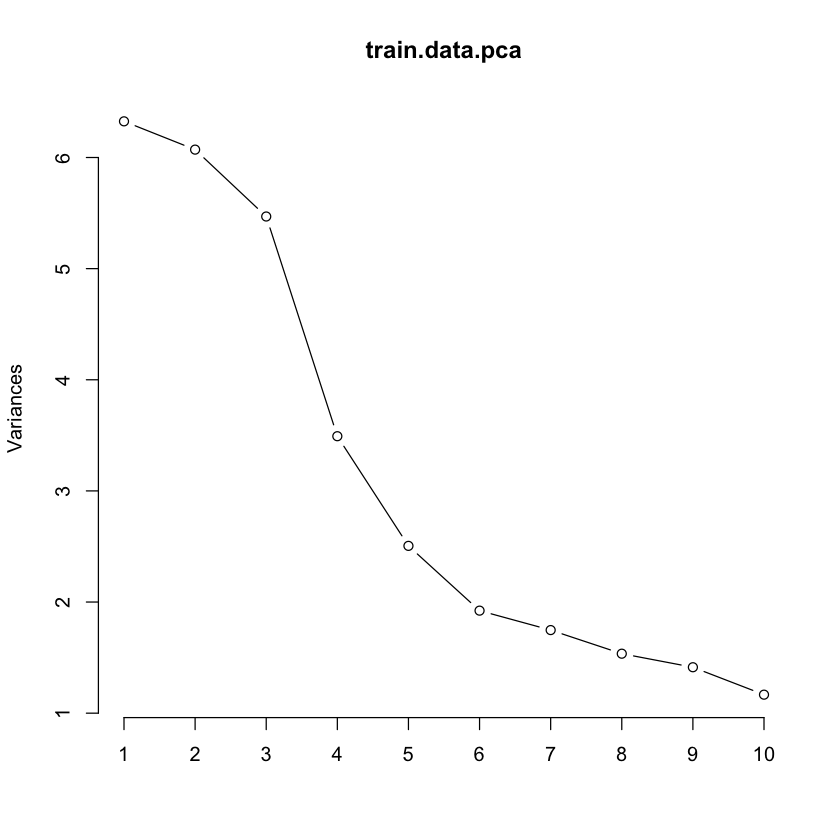

In [21]:
plot(train.data.pca, type = 'l')

In [22]:
summary(train.data.pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.5150 2.4639 2.3386 1.86872 1.58284 1.38658 1.32200
Proportion of Variance 0.1491 0.1431 0.1290 0.08234 0.05907 0.04533 0.04121
Cumulative Proportion  0.1491 0.2923 0.4212 0.50356 0.56263 0.60796 0.64916
                          PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.2390 1.18882 1.0800 1.03758 0.96940 0.85080 0.82104
Proportion of Variance 0.0362 0.03332 0.0275 0.02538 0.02216 0.01707 0.01589
Cumulative Proportion  0.6854 0.71868 0.7462 0.77157 0.79372 0.81079 0.82668
                          PC15    PC16   PC17    PC18    PC19   PC20    PC21
Standard deviation     0.78990 0.73199 0.7015 0.65663 0.63450 0.5932 0.57723
Proportion of Variance 0.01471 0.01263 0.0116 0.01017 0.00949 0.0083 0.00786
Cumulative Proportion  0.84139 0.85403 0.8656 0.87580 0.88529 0.8936 0.90144
                          PC22    PC23    PC24   PC25 

In [23]:
predict(train.data.pca, newdata=tail(train.data.log, 2))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
5619,0.5401065,0.09655063,2.8206954,1.0670961,0.9549883,0.05858353,-0.3551165,1.359803,1.6101530,0.1743566,⋯,-0.01027184,0.004925168,-0.004361626,0.007999590,0.0004078347,0.002043974,0.001068349,0.002459485,1.212394e-16,3.398827e-18
5620,1.5674604,1.60896784,-0.9389826,0.7051903,-1.7133081,-0.18754375,-2.0378299,0.610128,0.3233728,1.3921725,⋯,-0.01093159,0.016982393,0.022151721,0.006839653,0.0049324310,-0.003719714,0.001587649,0.003989358,4.582844e-16,2.360895e-17


Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”

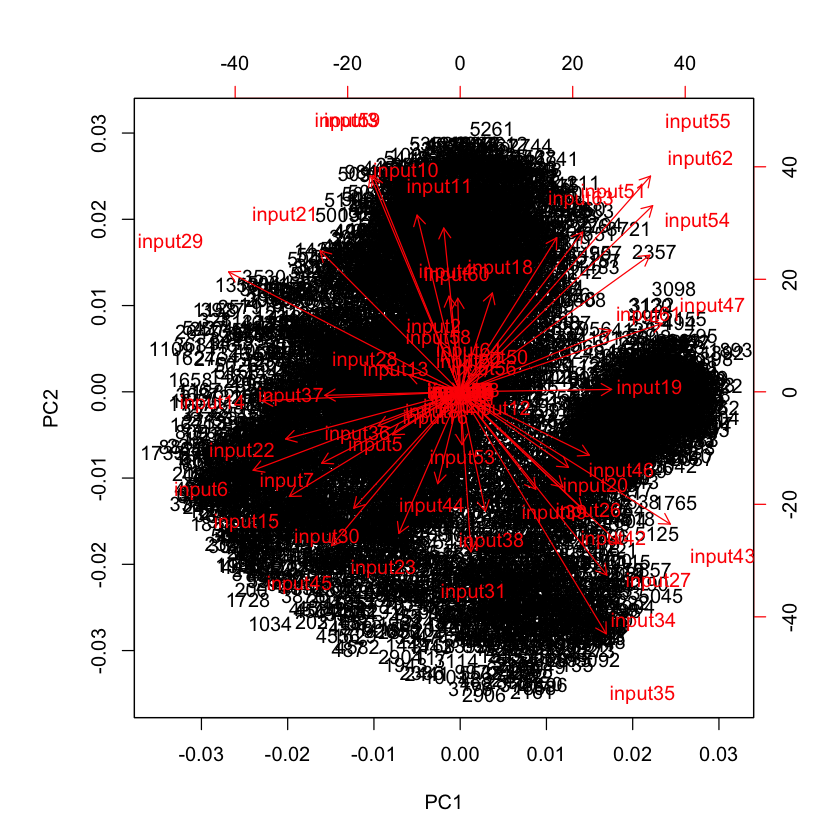

In [28]:
biplot(train.data.pca)